<a href="https://colab.research.google.com/github/Amitt-44/projects/blob/main/AnalyzingHealthData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# import requisite libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
data = pd.read_csv("ntrarogyaseva.csv")
data.head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,...,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,...,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D


In [7]:
# print summary statistics
data.describe()

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
count,460155.000000,460155.000000,460155.000000,460155.000000
mean,230078.000000,44.845439,30772.562234,27943.674225
std,132835.450897,19.001994,27775.593157,26284.506885
min,1.000000,0.000000,5.000000,2.000000
25%,115039.500000,34.000000,12500.000000,12500.000000
50%,230078.000000,47.000000,25000.000000,23230.000000
75%,345116.500000,59.000000,35000.000000,30870.000000
max,460155.000000,107.000000,520000.000000,520000.000000


In [8]:
# display all the column names in the data
data.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [9]:
# Display the counts of each value in the SEX column
data['SEX'].value_counts()

,count
SEX,
Male,250506
Female,170787
Male(Child),24319
Female(Child),14523
FEMALE,15
MALE,5


In [10]:
# mappings to standardize and clean the values
mappings = {'MALE' : 'Male', 'FEMALE' : 'Female', 'Male(Child)' : 'Boy', 'Female(Child)' : 'Girl'}
# replace values using the defined mappings
data['SEX'] = data['SEX'].replace(mappings)
data['SEX'].value_counts()

,count
SEX,
Male,250511
Female,170802
Boy,24319
Girl,14523


<Axes: xlabel='SEX'>

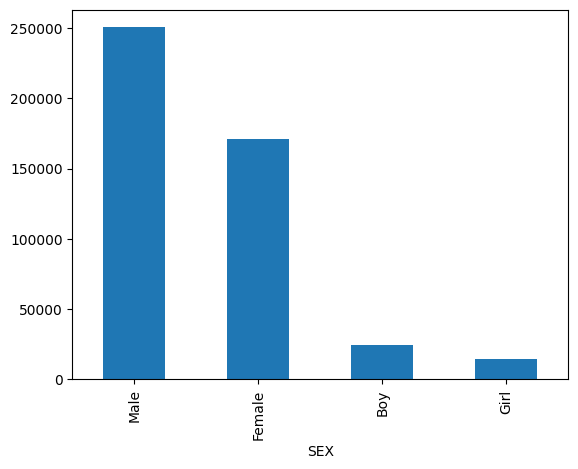

In [11]:
# plot the value counts of sex
data['SEX'].value_counts().plot.bar()

In [12]:
# print the mean, median and mode of the age distribution
print("Mean: {}".format(data['AGE'].mean()))
print("Median: {}".format(data['AGE'].median()))
print("Mode: {}".format(data['AGE'].mode()))

Mean: 44.84543903684628
Median: 47.0
Mode: 0    0
Name: AGE, dtype: int64


In [13]:
# print the top 10 ages
data['AGE'].value_counts().head(10)

,count
AGE,
0,17146
50,15703
55,14755
45,14531
60,13322
46,12198
56,11965
51,11764
65,11572


<Axes: ylabel='AGE'>

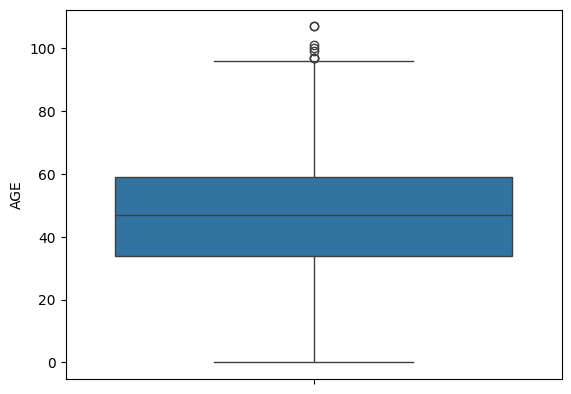

In [14]:
# better looking boxplot (using seaborn) for age variable
sns.boxplot(data['AGE'])

In [15]:
# subset involving only records of Krishna district
data[data['DISTRICT_NAME']=='Krishna'].head()

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,...,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
30,31,42,Female,OC,S12,MEDICAL ONCOLOGY,S12.26.1,Chemotherapy for Acute Myeloid Leukemia with I...,Ward-1,Vijayawada,...,60000,Nims Hospitals,G,HYDERABAD,Hyderabad,06/08/2014 00:00:00,01/09/2014 00:00:00,NO,NaN,D
56,57,52,Male,BC,M5,CARDIOLOGY,M5.1.2,Management Of Acute MI With Angiogram,Ward-26,Vijayawada,...,25000,OZONE HOSPITALS,C,HYDERABAD,Ranga Reddy,28/10/2014 00:00:00,06/11/2014 00:00:00,NO,NaN,D
58,59,17,Female,SC,S7,CARDIAC AND CARDIOTHORACIC SURGERY,S7.2.10.1,Mitral Valve Replacement (With Valve),Atapaka,Kaikalur,...,135000,Karumuri Hospital,C,GUNTUR,Guntur,04/11/2014 00:00:00,12/11/2014 00:00:00,NO,NaN,D
97,98,75,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Ward-13,Vijayawada,...,10000,Andhra Health Diagnostic Services LimitedGloba...,C,VIJAYAWADA,Krishna,08/04/2015 00:00:00,NaN,YES,03/05/2015 00:00:00,P
111,112,65,Male,OC,M7,NEUROLOGY,M7.4,Medical Management of Ischemic Strokes,Chilakalapudi (R),Machilipatnam,...,10000,Rims General Hospital,G,KADAPA,YSR Kadapa,28/05/2015 00:00:00,01/06/2015 00:00:00,NO,NaN,D


In [16]:
# Most common surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}nDisease and Count: {}".format(i,data[data['DISTRICT_NAME']==i]['SURGERY'].value_counts().head(1)))

District: SrikakulamnDisease and Count: SURGERY
Maintenance Hemodialysis For Crf    3936
Name: count, dtype: int64
District: KurnoolnDisease and Count: SURGERY
Surgical Correction Of Longbone Fracture    2830
Name: count, dtype: int64
District: VizianagaramnDisease and Count: SURGERY
Surgical Correction Of Longbone Fracture    2588
Name: count, dtype: int64
District: GunturnDisease and Count: SURGERY
Surgical Correction Of Longbone Fracture    4944
Name: count, dtype: int64
District: VishakhapatnamnDisease and Count: SURGERY
Maintenance Hemodialysis For Crf    5153
Name: count, dtype: int64
District: West GodavarinDisease and Count: SURGERY
Maintenance Hemodialysis For Crf    5312
Name: count, dtype: int64
District: KrishnanDisease and Count: SURGERY
Maintenance Hemodialysis For Crf    5874
Name: count, dtype: int64
District: East GodavarinDisease and Count: SURGERY
Surgical Correction Of Longbone Fracture    6649
Name: count, dtype: int64
District: PrakasamnDisease and Count: SURGERY


In [17]:
# Average claim amount for surgery by district
for i in data['DISTRICT_NAME'].unique():
    print("District: {}nAverage Claim Amount: ₹{}".format(i,data[data['DISTRICT_NAME']==i]['CLAIM_AMOUNT'].mean()))

District: SrikakulamnAverage Claim Amount: ₹25839.688381855638
District: KurnoolnAverage Claim Amount: ₹28901.303105550003
District: VizianagaramnAverage Claim Amount: ₹25369.976967918145
District: GunturnAverage Claim Amount: ₹31426.02654337551
District: VishakhapatnamnAverage Claim Amount: ₹26153.1105748758
District: West GodavarinAverage Claim Amount: ₹28410.17187140336
District: KrishnanAverage Claim Amount: ₹31486.26484951166
District: East GodavarinAverage Claim Amount: ₹26449.76837730598
District: PrakasamnAverage Claim Amount: ₹29022.620128016348
District: NellorenAverage Claim Amount: ₹26340.0007647881
District: YSR KadapanAverage Claim Amount: ₹28132.249100402172
District: ChittoornAverage Claim Amount: ₹25735.549822610832
District: AnantapurnAverage Claim Amount: ₹27927.162327495174


In [20]:
# group by surgery category to get mean statistics for numeric columns only
data.groupby('CATEGORY_NAME').mean(numeric_only=True)

,,AGE,PREAUTH_AMT,CLAIM_AMOUNT
CATEGORY_NAME,,,,
CARDIAC AND CARDIOTHORACIC SURGERY,219963.376403,51.758450,87071.490377,82503.768763
CARDIOLOGY,209958.711772,54.637374,33263.608382,26712.113486
COCHLEAR IMPLANT SURGERY,64429.337838,1.581081,520000.000000,516486.486486
CRITICAL CARE,215230.097309,50.782960,69947.664574,50345.246637
DERMATOLOGY,145752.231707,46.573171,28003.012195,21728.353659
ENDOCRINOLOGY,171994.181102,45.181102,18976.381890,14857.820866
ENT SURGERY,240742.200651,32.564155,15709.021685,14930.949001
GASTROENTEROLOGY,163079.237140,41.614969,37036.784979,23755.187500
GENERAL MEDICINE,111029.291450,35.281041,30307.052788,21738.559108
